In [100]:
import pandas as pd
import numpy as np

df = pd.read_csv('spam.csv', encoding='latin-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2617,ham,I cant pick the phone right now. Pls send a me...,NaN,NaN,NaN
1400,ham,"No, I decided that only people who care about ...",NaN,NaN,NaN
2548,ham,Honestly i've just made a lovely cup of tea an...,NaN,NaN,NaN
243,ham,Although i told u dat i'm into baig face watch...,NaN,NaN,NaN
6224,ham,"Good morning team, our weekly status meeting i...",NaN,NaN,NaN


In [101]:
df.shape

(6447, 5)

# Work Flow

1. Data Cleaning
2. EDA (Exploratory Data Analysis)
3. Text Preprosessing (Vectorization, Stemming, Removing stopwords etc)
4. Model Building
5. Evaluation of the model
6. Improvement of the model depending on evaluation
7. Making a website for this model
8. Deploy this website on Heroku

## Data Cleaning

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6447 entries, 0 to 6446
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          6447 non-null   object
 1   v2          6447 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 252.0+ KB


In [103]:
# drop last three columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [104]:
# renaming columns
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)
df.head(5)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [105]:
# labelling the labels (target variable)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])         # ham= 0, spam = 1

df.head(5)

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [106]:
df['label'].value_counts()

label
0    5028
1    1419
Name: count, dtype: int64

In [107]:
# checking for missing values
df.isnull().sum()

label      0
message    0
dtype: int64

In [108]:
# checkfor duplicates
df.duplicated().sum()

537

In [109]:
# remove the 403 duplicates
# this method is to remove duplicate rows from df, keeping only the first occurrence of each duplicate.
df = df.drop_duplicates(keep='first')

In [110]:
df.duplicated().sum()

0

In [111]:
df.shape

(5910, 2)

In [112]:
df['label'].value_counts()

label
0    4695
1    1215
Name: count, dtype: int64

## EDA

In [113]:
df['label'].value_counts() # spam is less than ham, which is not good. Data is imbalanced.

label
0    4695
1    1215
Name: count, dtype: int64

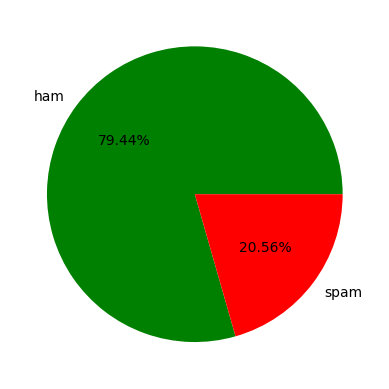

In [114]:
# visualizing this using pie chart
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f%%', colors=['green', 'red'])
plt.show()

In [115]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\SUBHANKAR
[nltk_data]     BISWAS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

Here we shall create 3 new columns

In [116]:
# a new column having numbers of chars in the message
df['num_chars'] = df['message'].apply(len)
df.head(5)

,label,message,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [117]:
# number of words in the message
df['num_words'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head(5)

,label,message,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [118]:
# number of sentences in the message
df['num_sentences'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head(5)

,label,message,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [119]:
#getting insignts based on ham
df[df['label'] == 0][['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,4695.000000,4695.000000,4695.000000
mean,108.643237,24.251331,2.216187
std,265.054539,50.417552,3.029171
min,2.000000,1.000000,1.000000
25%,34.000000,9.000000,1.000000
50%,54.000000,13.000000,1.000000
75%,94.000000,23.000000,2.000000
max,1984.000000,369.000000,38.000000


In [120]:
#getting insignts based on spam
df[df['label'] == 1][['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,1215.000000,1215.000000,1215.000000
mean,219.947325,39.776955,3.336626
std,283.103911,47.788735,2.786961
min,13.000000,2.000000,1.000000
25%,77.000000,15.000000,2.000000
50%,144.000000,28.000000,3.000000
75%,160.000000,34.000000,4.000000
max,1158.000000,208.000000,12.000000


<Axes: xlabel='num_chars', ylabel='Count'>

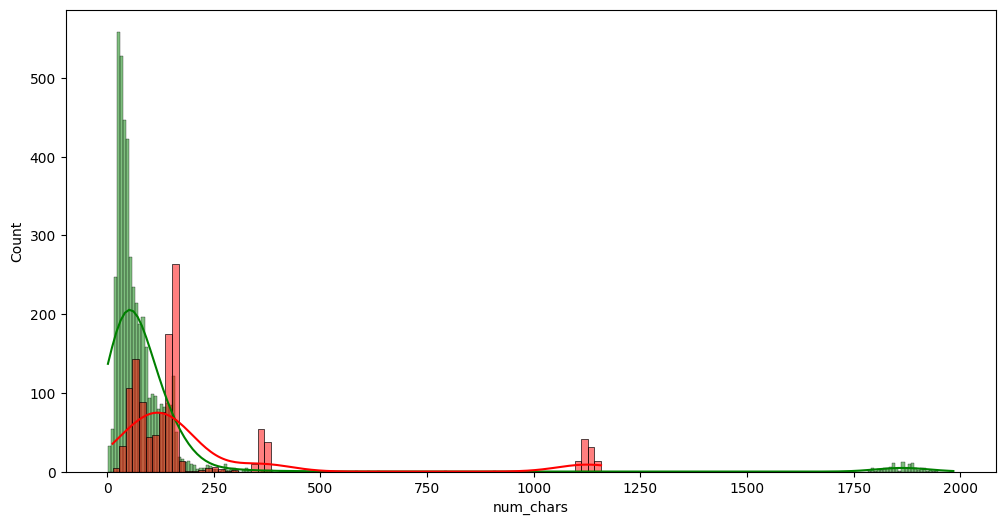

In [121]:
# so we can see that spam messages are longer than ham messages, on average.
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 0]['num_chars'], color='green', label='ham', kde=True)
sns.histplot(df[df['label'] == 1]['num_chars'], color='red', label='spam', kde=True)

<Axes: xlabel='num_words', ylabel='Count'>

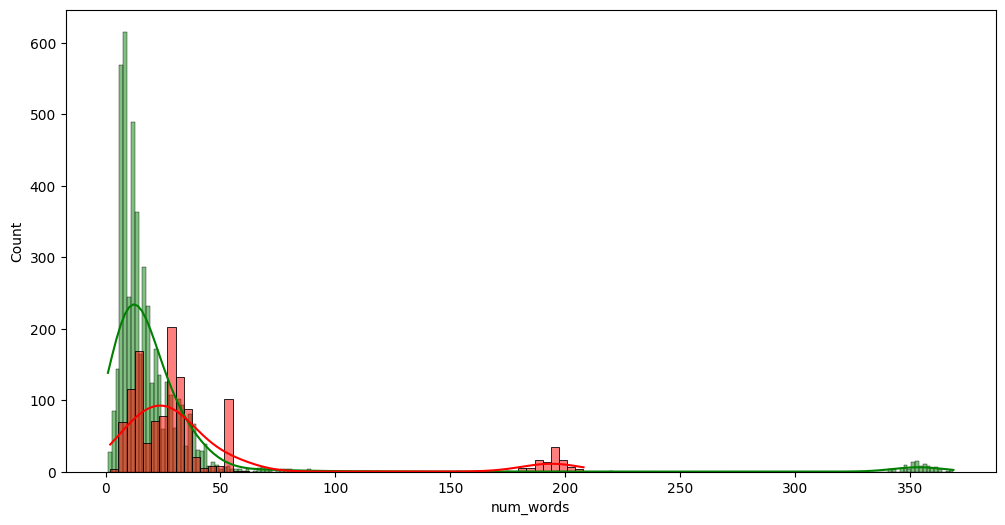

In [122]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 0]['num_words'], color='green', label='ham', kde=True)
sns.histplot(df[df['label'] == 1]['num_words'], color='red', label='spam', kde=True)

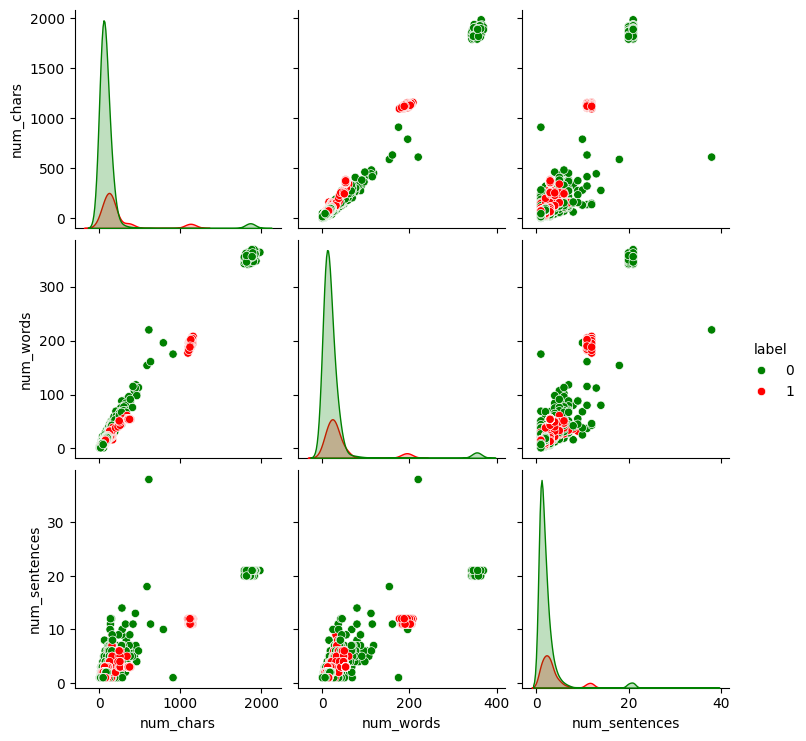

In [123]:
sns.pairplot(df, hue='label', palette=['green', 'red'])

<Axes: >

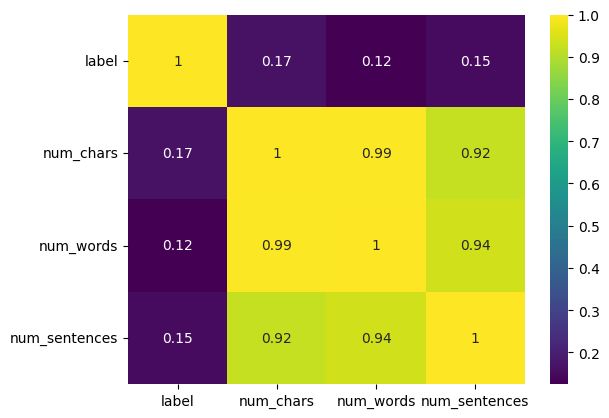

In [124]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis')

## Text Preprocessing

1. Lower Case
2. Tokenization
3. Removing Special Chars
4. Removing stop words and puntuations
5. Stemming or lemmatization (removing wrods of similar meaning- play, playing, placed ==> play)

In [125]:
# removing punctuations and stopwords
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [126]:
def transform_text(text):
    text = text.lower()  # convert to lowercase
    text = nltk.word_tokenize(text)  # tokenize the text eg- ['hello', 'how', 'are', 'you']
    
    y = []
    # stopwords and puntuation removal
    for i in text:
        # if i not in stopwords.words('english') and i not in string.punctuation:
        if i not in string.punctuation:
            # if the word is not a stopword and not a punctuation, keep it
            y.append(i)
            
    text = y[:]
    y.clear()  # clear the list for reuse
    for i in text:
        if i.isalnum():
            y.append(i)  # keep only alphanumeric characters
            
    text = y[:]
    y.clear()
    # lemmatization
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [127]:
transform_text("There is a huge discount on the product, don't miss it!")

'there is a huge discount on the product do miss it'

In [128]:
df['message'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [129]:
transform_text(df['message'][10])

'i gon na be home soon and i do want to talk about thi stuff anymor tonight k i cri enough today'

In [130]:
df['cleaned_message'] = df['message'].apply(transform_text)

In [131]:
df.head(5)

,label,message,num_chars,num_words,num_sentences,cleaned_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


In [132]:
# top 50 words in spam messages in a list
spam_corpus = []
for message in df[df['label'] == 1]['cleaned_message'].tolist():
    for word in message.split():
        spam_corpus.append(word)


In [133]:
len(spam_corpus)

40864

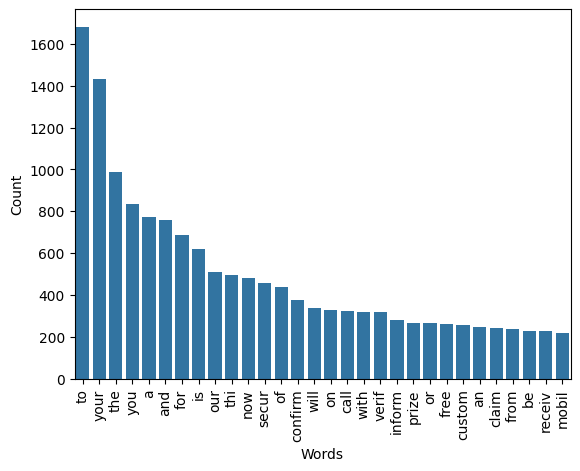

<Figure size 2000x800 with 0 Axes>

In [134]:
from collections import Counter
spam_counter = Counter(spam_corpus)
spam_words_df = pd.DataFrame(spam_counter.most_common(30))
sns.barplot(x=spam_words_df[0], y=spam_words_df[1])
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Count')
figsize=(20, 8)
plt.figure(figsize=figsize)
plt.show()

In [135]:
pd.DataFrame(spam_counter.most_common(30)).head(5)

,0,1
0,to,1680
1,your,1432
2,the,988
3,you,833
4,a,773


## Model Building and Evaluation

### 1. Naive Bayes Classifier

In [136]:
# Here out input (cleaned _message) is in text format, we need to convert it into a numerical format. That is, we need to vectorize the text data.
# Using BagOfWords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=4000) #parameter tuning using max_features to limit the number of features to 3000
# X = cv.fit_transform(df['cleaned_message']).toarray()  # convert to dense array from sparse matrix
X = tfidf.fit_transform(df['cleaned_message']).toarray()  # convert to dense array from sparse matrix

In [137]:
X.shape # (5169, 6708)  # 5169 messages, 6708 unique words

(5910, 4000)

In [138]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [139]:
# Scaling X (model performance improvement)
# later we saw no substantial difference in performance with and without scaling, so we commented it out.
# from sklearn.preprocessing import MinMaxScaler
# # we have used MinMaxScaler not StandardScaler as StandardScalar gives -ve values which NB don't take.
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [140]:
y = df['label'].values  # target variable
y

array([0, 0, 1, ..., 0, 0, 0])

In [141]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [142]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [143]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score

Training the models

In [144]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred1))
print("GaussianNB Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("GaussianNB Classification Report:\n", classification_report(y_test, y_pred1))
print("GaussianNB Precision:", precision_score(y_test, y_pred1))


GaussianNB Accuracy: 0.8527918781725888
GaussianNB Confusion Matrix:
 [[797 142]
 [ 32 211]]
GaussianNB Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.85      0.90       939
           1       0.60      0.87      0.71       243

    accuracy                           0.85      1182
   macro avg       0.78      0.86      0.80      1182
weighted avg       0.89      0.85      0.86      1182

GaussianNB Precision: 0.5977337110481586


In [145]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print("MultinominalNB Accuracy:", accuracy_score(y_test, y_pred2))
print("MultinominalNB Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("MultinominalNB Classification Report:\n", classification_report(y_test, y_pred2))
print("MultinominalNB Precision:", precision_score(y_test, y_pred2))

MultinominalNB Accuracy: 0.961082910321489
MultinominalNB Confusion Matrix:
 [[936   3]
 [ 43 200]]
MultinominalNB Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       939
           1       0.99      0.82      0.90       243

    accuracy                           0.96      1182
   macro avg       0.97      0.91      0.94      1182
weighted avg       0.96      0.96      0.96      1182

MultinominalNB Precision: 0.9852216748768473


In [146]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print("BernouliNB Accuracy:", accuracy_score(y_test, y_pred3))
print("BernouliNB Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))
print("BernouliNB Classification Report:\n", classification_report(y_test, y_pred3))
print("BernouliNB Precision:", precision_score(y_test, y_pred3))

BernouliNB Accuracy: 0.94331641285956
BernouliNB Confusion Matrix:
 [[938   1]
 [ 66 177]]
BernouliNB Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97       939
           1       0.99      0.73      0.84       243

    accuracy                           0.94      1182
   macro avg       0.96      0.86      0.90      1182
weighted avg       0.95      0.94      0.94      1182

BernouliNB Precision: 0.9943820224719101


So we have choosen mnb with tfidf.

### Save the model MultinominalNB

In [147]:
import pickle
# Saving the vectorizer and model
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model_mnb.pkl', 'wb'))